In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
penguin=pd.read_csv("Iris flower data.csv")

In [3]:
penguin.head()

,studyName,Sample Number,Species,Island,Individual ID,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Torgersen,N1A1,11/11/2007,39.1,18.7,181,.,MALE,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Torgersen,N1A2,11/11/2007,39.5,17.4,186,3800,FEMALE,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Torgersen,N2A1,11/16/2007,40.3,18.0,.,3250,FEMALE,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Torgersen,N2A2,11/16/2007,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Torgersen,N3A1,11/16/2007,36.7,19.3,193,3450,FEMALE,NaN


In [4]:
penguin.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Island               344 non-null    object 
 4   Individual ID        344 non-null    object 
 5   Date Egg             344 non-null    object 
 6   Culmen Length (mm)   342 non-null    float64
 7   Culmen Depth (mm)    342 non-null    float64
 8   Flipper Length (mm)  342 non-null    object 
 9   Body Mass (g)        342 non-null    object 
 10  Sex                  334 non-null    object 
 11  Comments             26 non-null     object 
dtypes: float64(2), int64(1), object(9)
memory usage: 32.4+ KB


In [5]:
#dropping insignificant variables
penguin.columns

Index(['studyName', 'Sample Number', 'Species', 'Island', 'Individual ID',
       'Date Egg', 'Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)', 'Body Mass (g)', 'Sex', 'Comments'],
      dtype='object')

In [6]:
penguin.drop(['studyName', 'Sample Number','Individual ID','Date Egg','Comments'],inplace=True,axis=1)

In [7]:
penguin.head()

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.1,18.7,181,.,MALE
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,40.3,18.0,.,3250,FEMALE
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,36.7,19.3,193,3450,FEMALE


In [8]:
#Data Preprocessing
#Missing values
penguin.isnull().sum()/len(penguin)*100

Species                0.000000
Island                 0.000000
Culmen Length (mm)     0.581395
Culmen Depth (mm)      0.581395
Flipper Length (mm)    0.581395
Body Mass (g)          0.581395
Sex                    2.906977
dtype: float64

In [9]:
penguin.isnull().sum()

Species                 0
Island                  0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
dtype: int64

In [ ]:
#Flipper Length (mm)  342 non-null    object -because fullstop is there in some 
 #Body Mass (g)        342 non-null    object-because fullstop is there in some

In [10]:
penguin['Flipper Length (mm)'].value_counts()

190    22
187    16
195    16
193    15
210    14
191    13
215    12
196    10
197    10
185     9
220     8
198     8
208     8
216     8
212     7
186     7
230     7
192     7
181     7
189     7
184     7
188     6
222     6
201     6
213     6
217     6
199     6
214     6
209     5
219     5
218     5
221     5
203     5
180     5
194     5
178     4
200     4
228     4
225     4
202     4
205     3
224     3
182     3
223     2
183     2
229     2
211     2
207     2
231     1
176     1
174     1
.       1
206     1
172     1
179     1
226     1
Name: Flipper Length (mm), dtype: int64

In [11]:
penguin['Flipper Length (mm)']=np.where(penguin['Flipper Length (mm)']=='.','190',penguin['Flipper Length (mm)'])#replacing '.' with mode
#penguin['Flipper Length (mm)']=np.where(penguin['Flipper Length (mm)']=='.',np.nan,penguin['Flipper Length (mm)'])

In [12]:
penguin['Flipper Length (mm)'].value_counts()

190    23
195    16
187    16
193    15
210    14
191    13
215    12
197    10
196    10
185     9
220     8
198     8
208     8
216     8
212     7
186     7
181     7
189     7
230     7
192     7
184     7
199     6
213     6
188     6
214     6
217     6
222     6
201     6
219     5
209     5
218     5
221     5
203     5
194     5
180     5
178     4
225     4
228     4
202     4
200     4
182     3
224     3
205     3
229     2
183     2
207     2
223     2
211     2
231     1
206     1
174     1
172     1
179     1
176     1
226     1
Name: Flipper Length (mm), dtype: int64

In [13]:
penguin['Flipper Length (mm)']=pd.to_numeric(penguin['Flipper Length (mm)'])

In [14]:
penguin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Culmen Length (mm)   342 non-null    float64
 3   Culmen Depth (mm)    342 non-null    float64
 4   Flipper Length (mm)  342 non-null    float64
 5   Body Mass (g)        342 non-null    object 
 6   Sex                  334 non-null    object 
dtypes: float64(3), object(4)
memory usage: 18.9+ KB


In [15]:
penguin['Body Mass (g)'].value_counts()

3800    12
3700    11
3900    10
3950    10
3550     9
        ..
4475     1
3975     1
3575     1
3850     1
5750     1
Name: Body Mass (g), Length: 95, dtype: int64

In [16]:
penguin['Body Mass (g)']=np.where(penguin['Body Mass (g)']=='.','3800',penguin['Body Mass (g)'])
#penguin['Body Mass (g)']=np.where(penguin['Body Mass (g)']=='.',np.nan,penguin['Body Mass (g)'])

In [17]:
penguin['Body Mass (g)']=pd.to_numeric(penguin['Body Mass (g)'])

In [18]:
penguin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Culmen Length (mm)   342 non-null    float64
 3   Culmen Depth (mm)    342 non-null    float64
 4   Flipper Length (mm)  342 non-null    float64
 5   Body Mass (g)        342 non-null    float64
 6   Sex                  334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


<AxesSubplot:ylabel='Culmen Length (mm)'>

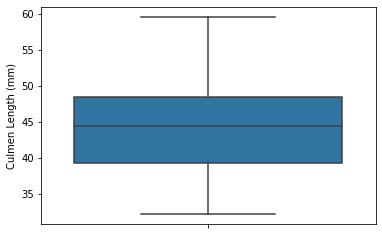

In [19]:
#now handling missing values
#first handling numeric variables so check for outliers first(actually for DT we dont need to do outloier treatment ,here we are chcking to decide we need to take mean or median)
sns.boxplot(y='Culmen Length (mm)',data=penguin)#no outliers,so mean


<AxesSubplot:ylabel='Culmen Depth (mm)'>

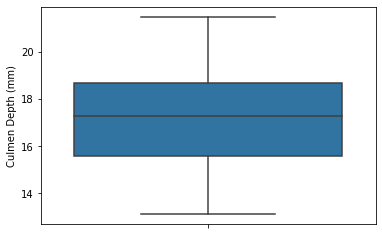

In [20]:
sns.boxplot(y='Culmen Depth (mm)',data=penguin)#no outliers so mean

<AxesSubplot:ylabel='Flipper Length (mm)'>

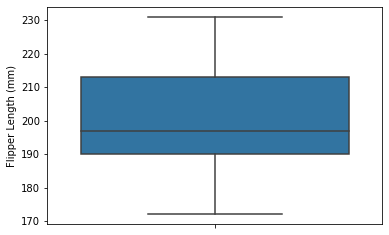

In [23]:
sns.boxplot(y='Flipper Length (mm)',data=penguin)#no outliers so mean

<AxesSubplot:ylabel='Body Mass (g)'>

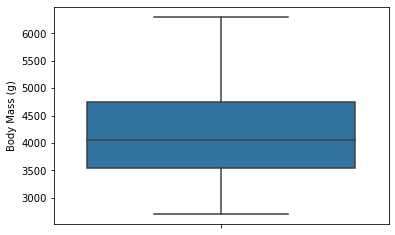

In [21]:
sns.boxplot(y='Body Mass (g)',data=penguin)#no outliers so mean

In [22]:
penguin.columns

Index(['Species', 'Island', 'Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)', 'Body Mass (g)', 'Sex'],
      dtype='object')

In [23]:
penguin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Culmen Length (mm)   342 non-null    float64
 3   Culmen Depth (mm)    342 non-null    float64
 4   Flipper Length (mm)  342 non-null    float64
 5   Body Mass (g)        342 non-null    float64
 6   Sex                  334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [24]:
penguin['Culmen Length (mm)']=penguin['Culmen Length (mm)'].fillna(penguin['Culmen Length (mm)'].mean())

In [25]:
penguin['Culmen Depth (mm)']=penguin['Culmen Depth (mm)'].fillna(penguin['Culmen Depth (mm)'].mean())

In [26]:
penguin['Flipper Length (mm)']=penguin['Flipper Length (mm)'].fillna(penguin['Flipper Length (mm)'].mean())

In [27]:
penguin['Body Mass (g)']=penguin['Body Mass (g)'].fillna(penguin['Body Mass (g)'].mean())

In [28]:
penguin.isnull().sum()

Species                 0
Island                  0
Culmen Length (mm)      0
Culmen Depth (mm)       0
Flipper Length (mm)     0
Body Mass (g)           0
Sex                    10
dtype: int64

In [29]:
penguin['Sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: Sex, dtype: int64

In [30]:
#Here one'.' is there so handle it first
penguin['Sex']=np.where(penguin['Sex']=='.','MALE',penguin['Sex'])
#penguin['Sex']=np.where(penguin['Sex']=='.',np.nan,penguin['Sex'])

In [31]:
penguin['Sex'].value_counts()

MALE      169
FEMALE    165
Name: Sex, dtype: int64

In [32]:
penguin['Sex']=penguin['Sex'].fillna('MALE')

In [33]:
penguin.isnull().sum()

Species                0
Island                 0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
dtype: int64

In [34]:
#Encoding
penguin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Culmen Length (mm)   344 non-null    float64
 3   Culmen Depth (mm)    344 non-null    float64
 4   Flipper Length (mm)  344 non-null    float64
 5   Body Mass (g)        344 non-null    float64
 6   Sex                  344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [35]:
#Label Encoder
penguin['Species']=penguin['Species'].astype('category')
penguin['Species']=penguin['Species'].cat.codes

In [36]:
penguin['Island']=penguin['Island'].astype('category')
penguin['Island']=penguin['Island'].cat.codes

In [37]:
penguin['Sex']=penguin['Sex'].astype('category')
penguin['Sex']=penguin['Sex'].cat.codes

In [38]:
#One Hot Encoder
#Dont do for dependent variable(species-->just did leabel encoder to get 0,1,2)
penguin=pd.get_dummies(penguin,columns=['Island','Sex'])

In [39]:
penguin.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Island_0,Island_1,Island_2,Sex_0,Sex_1
0,0,39.10000,18.70000,181.000000,3800.000000,0,0,1,0,1
1,0,39.50000,17.40000,186.000000,3800.000000,0,0,1,1,0
2,0,40.30000,18.00000,190.000000,3250.000000,0,0,1,1,0
3,0,43.92193,17.15117,200.900585,4201.900585,0,0,1,0,1
4,0,36.70000,19.30000,193.000000,3450.000000,0,0,1,1,0


In [40]:
penguin=penguin.drop(['Island_0','Sex_0'],axis=1)

In [41]:
penguin.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Island_1,Island_2,Sex_1
0,0,39.10000,18.70000,181.000000,3800.000000,0,1,1
1,0,39.50000,17.40000,186.000000,3800.000000,0,1,0
2,0,40.30000,18.00000,190.000000,3250.000000,0,1,0
3,0,43.92193,17.15117,200.900585,4201.900585,0,1,1
4,0,36.70000,19.30000,193.000000,3450.000000,0,1,0


Number of Males: 179
Number of Females: 165


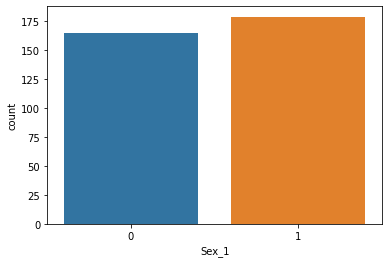

In [45]:
#We need to see how many males and females are there
sns.countplot(data=penguin,x='Sex_1')
Male,Female=penguin['Sex_1'].value_counts()
print("Number of Males:",Male)
print("Number of Females:",Female)
plt.show()

Number of A: 152
Number of B: 124
Number of C: 68


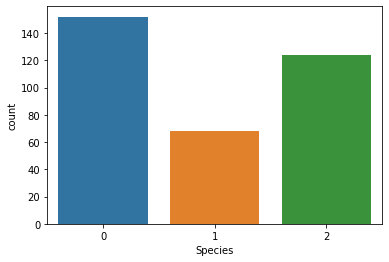

In [46]:
#To see the species
sns.countplot(data=penguin,x='Species')
A,B,C=penguin['Species'].value_counts()
print("Number of A:",A)
print("Number of B:",B)
print("Number of C:",C)
plt.show()

<AxesSubplot:xlabel='Culmen Length (mm)', ylabel='Culmen Depth (mm)'>

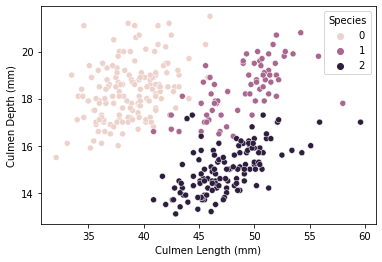

In [48]:
sns.scatterplot(x='Culmen Length (mm)',y='Culmen Depth (mm)',data=penguin,hue='Species')

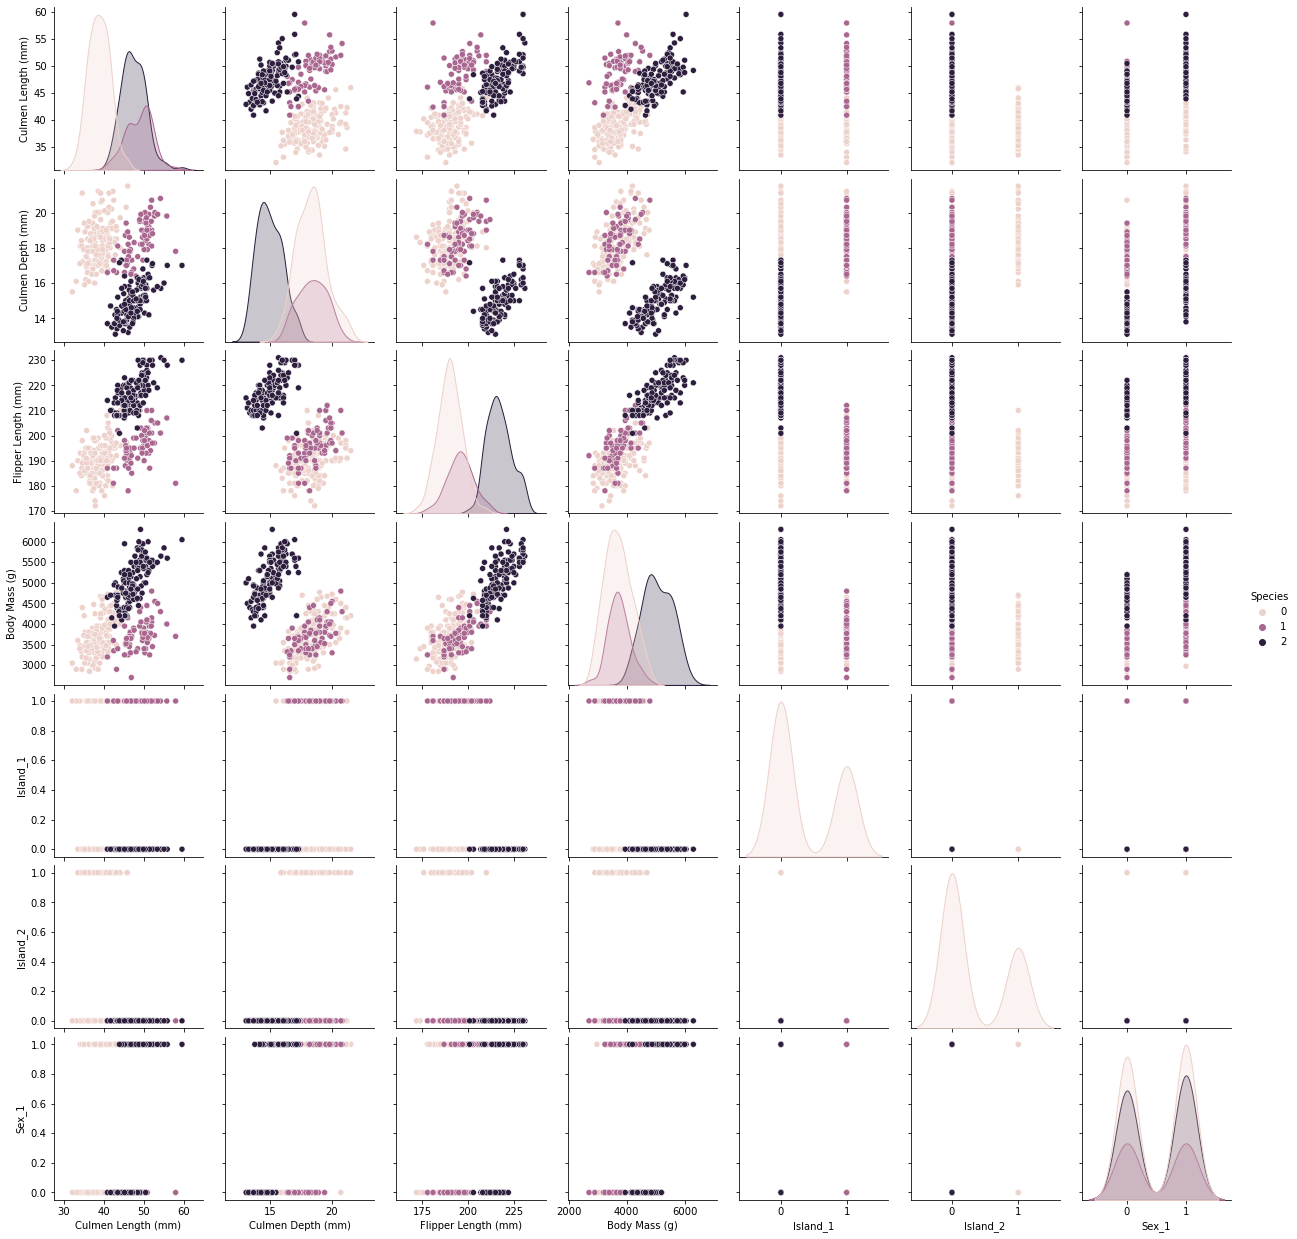

In [49]:
sns.pairplot(data=penguin,hue='Species')

<AxesSubplot:>

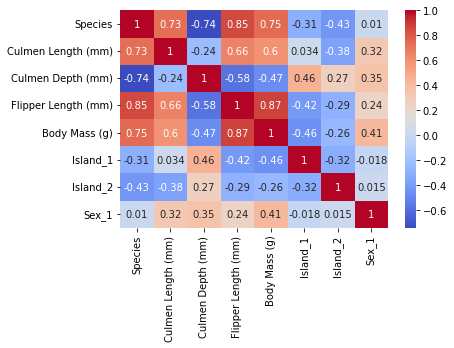

In [50]:
sns.heatmap(penguin.corr(),annot=True,cmap='coolwarm')

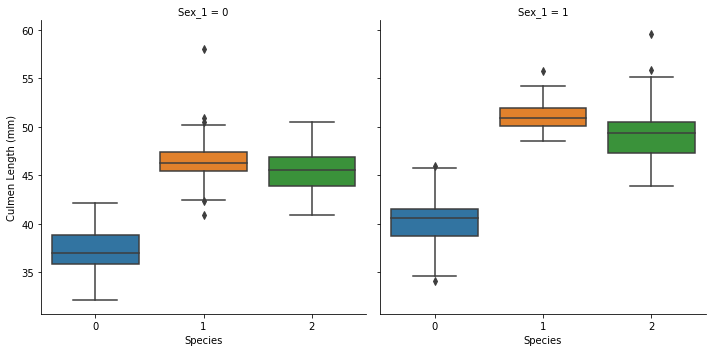

In [52]:
#Categorical Plot
sns.catplot(data=penguin,x='Species',y='Culmen Length (mm)',kind='box',col='Sex_1')

In [53]:
#Splitting data into dependent and independent variable
penguin.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Island_1,Island_2,Sex_1
0,0,39.10000,18.70000,181.000000,3800.000000,0,1,1
1,0,39.50000,17.40000,186.000000,3800.000000,0,1,0
2,0,40.30000,18.00000,190.000000,3250.000000,0,1,0
3,0,43.92193,17.15117,200.900585,4201.900585,0,1,1
4,0,36.70000,19.30000,193.000000,3450.000000,0,1,0


In [54]:
x=penguin.iloc[:,1:]

In [55]:
y=penguin.iloc[:,0]

In [56]:
x.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Island_1,Island_2,Sex_1
0,39.10000,18.70000,181.000000,3800.000000,0,1,1
1,39.50000,17.40000,186.000000,3800.000000,0,1,0
2,40.30000,18.00000,190.000000,3250.000000,0,1,0
3,43.92193,17.15117,200.900585,4201.900585,0,1,1
4,36.70000,19.30000,193.000000,3450.000000,0,1,0


In [57]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int8

In [60]:
#Splitting data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.75,random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(258, 7)
(86, 7)
(258,)
(86,)


In [61]:
#Decision Tree Model Building
from sklearn.tree import DecisionTreeClassifier
dt1=DecisionTreeClassifier(criterion='gini')
dt1.fit(x_train,y_train)
dt2=DecisionTreeClassifier(criterion='entropy')
dt2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [62]:
#Pedicting the test and train data using the DecisionTree Model
y_pred_test_dt1=dt1.predict(x_test)
y_pred_train_dt1=dt1.predict(x_train)

y_pred_test_dt2=dt2.predict(x_test)
y_pred_train_dt2=dt2.predict(x_train)

In [63]:
#Now checking the prediction is right
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [65]:
#Classification report for training data
print(classification_report(y_train,y_pred_train_dt1))
print('###'*20)
print(classification_report(y_train,y_pred_train_dt2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        96

    accuracy                           1.00       258
   macro avg       1.00      1.00      1.00       258
weighted avg       1.00      1.00      1.00       258

############################################################
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        96

    accuracy                           1.00       258
   macro avg       1.00      1.00      1.00       258
weighted avg       1.00      1.00      1.00       258



In [64]:
#Classification report for testing data
print(classification_report(y_test,y_pred_test_dt1))
print('###'*20)
print(classification_report(y_test,y_pred_test_dt2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        28

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86

############################################################
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        37
           1       0.87      0.95      0.91        21
           2       1.00      1.00      1.00        28

    accuracy                           0.95        86
   macro avg       0.95      0.96      0.95        86
weighted avg       0.96      0.95      0.95        86



In [66]:
#Confusion Matrix for training data
print(confusion_matrix(y_train,y_pred_train_dt1))
print('###'*20)
print(confusion_matrix(y_train,y_pred_train_dt2))

[[115   0   0]
 [  0  47   0]
 [  0   0  96]]
############################################################
[[115   0   0]
 [  0  47   0]
 [  0   0  96]]


In [67]:
#Confusion Matrix for testing data
print(confusion_matrix(y_test,y_pred_test_dt1))
print('###'*20)
print(confusion_matrix(y_test,y_pred_test_dt2))

[[37  0  0]
 [ 0 21  0]
 [ 0  0 28]]
############################################################
[[34  3  0]
 [ 1 20  0]
 [ 0  0 28]]


In [68]:
#Accuracy Score for training data
print(accuracy_score(y_train,y_pred_train_dt1))
print('###'*20)
print(accuracy_score(y_train,y_pred_train_dt2))

1.0
############################################################
1.0


In [69]:
#Accuracy Score for testing data
print(accuracy_score(y_test,y_pred_test_dt1))
print('###'*20)
print(accuracy_score(y_test,y_pred_test_dt2))

1.0
############################################################
0.9534883720930233


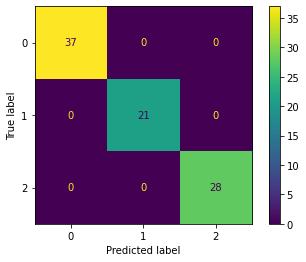

In [70]:
#Plotting Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dt1,x_test,y_test)
plt.show()

In [73]:
#How much contribution independent variables are giving to predict the dependent variable
pd.DataFrame(index=x.columns,data=dt1.feature_importances_,columns=['Feature Importance'])

,Feature Importance
Culmen Length (mm),0.343351
Culmen Depth (mm),0.039629
Flipper Length (mm),0.546745
Body Mass (g),0.000000
Island_1,0.026674
Island_2,0.006155
Sex_1,0.037446


In [ ]:
#BodyMass is not significant as giving 0% contribution in detecting the Species so we can go back and drop this variable

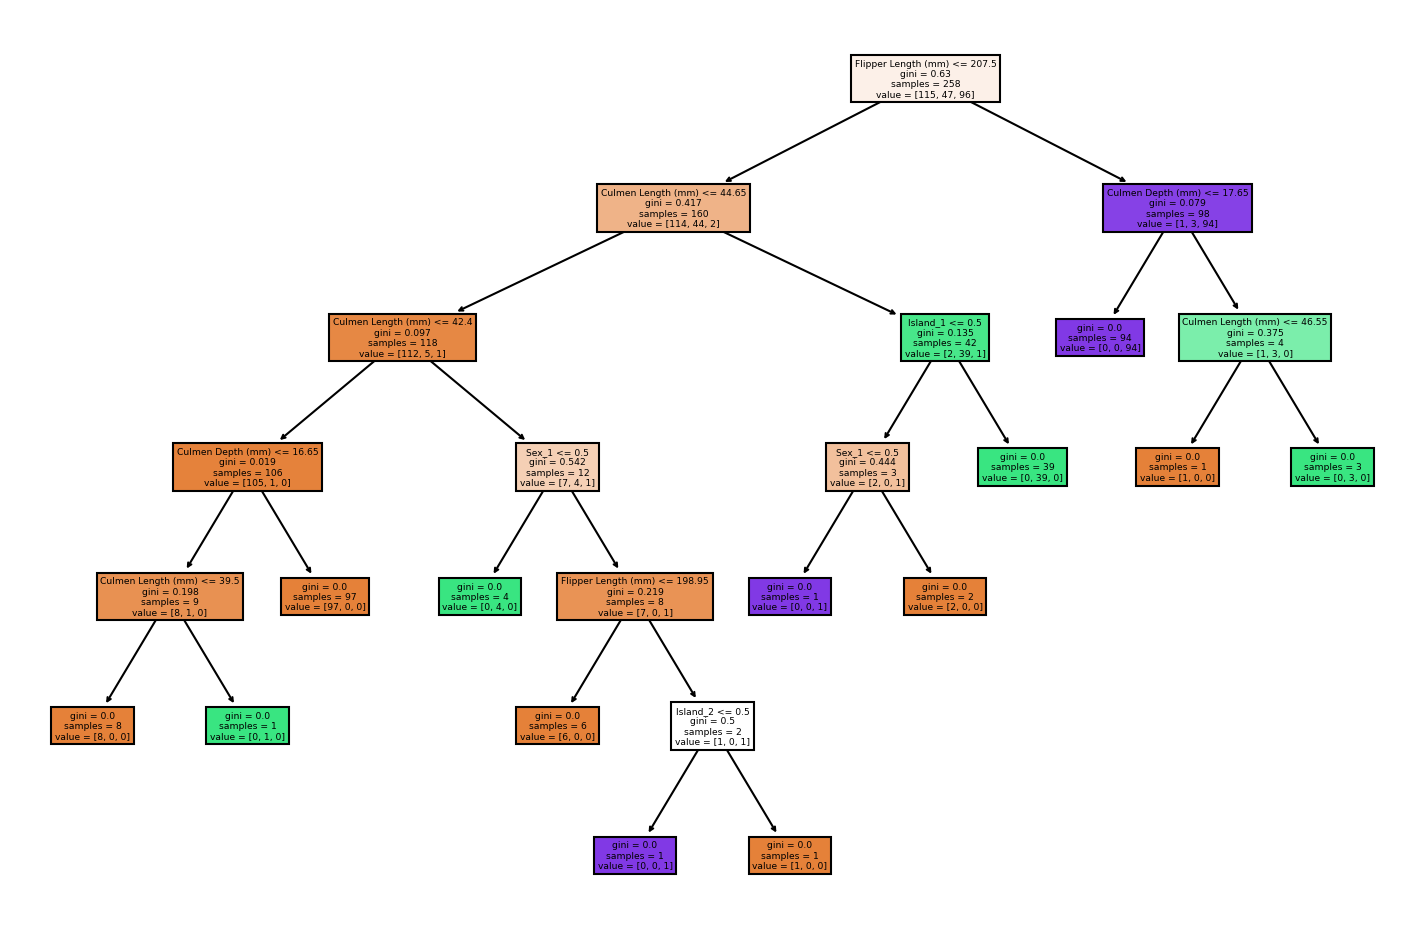

In [75]:
#Visualization
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8),dpi=150)
plot_tree(dt1,filled=True,feature_names=x.columns)
plt.show()

In [ ]:
#Here Flipper Length is the root node as it have the high gini value or low entropy value or information gain is maximum.
#When gini becomes 0 it is a leaf/terminal node
#Values given is like how many model can identify among the three species

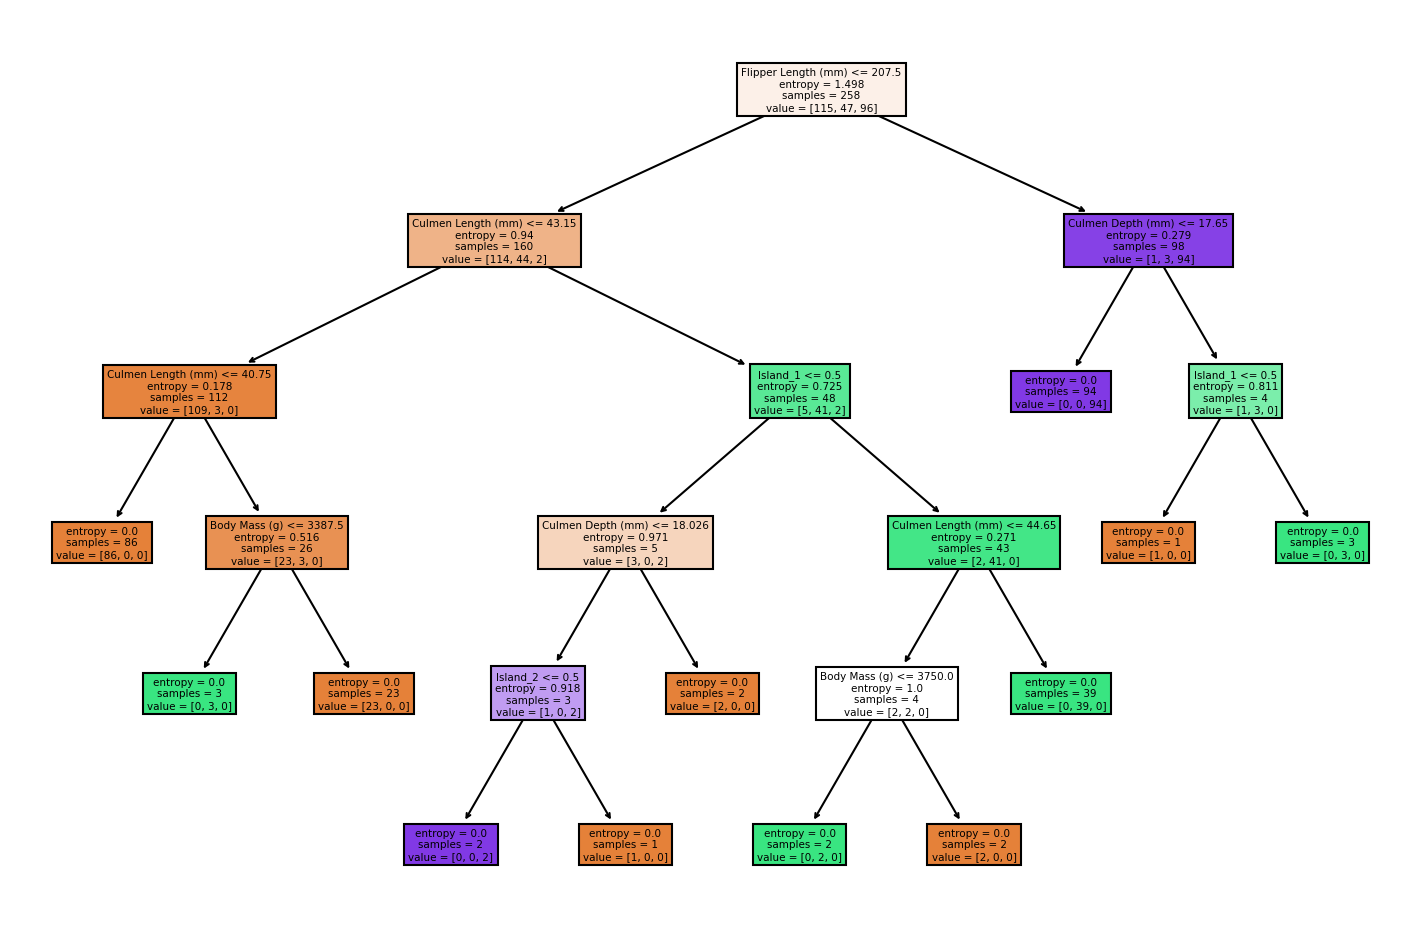

In [76]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(dt2,filled=True,feature_names=x.columns)
plt.show()